# AKARSH S NAIR


# AM.EN.U4AIE21008

In [76]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import *


## 1) Create  an  array  x  =  [1,  1,  2,  3,  4,  3,  4,  6,  4]  using  numpy.  Calculate  a  function h(x)=t0+t1*x, where t0=1.2 and t1=0.5, for all values of x and plot a graph with x on one axis and h(x)on another axis. 

array([1.7, 1.7, 2.2, 2.7, 3.2, 2.7, 3.2, 4.2, 3.2])

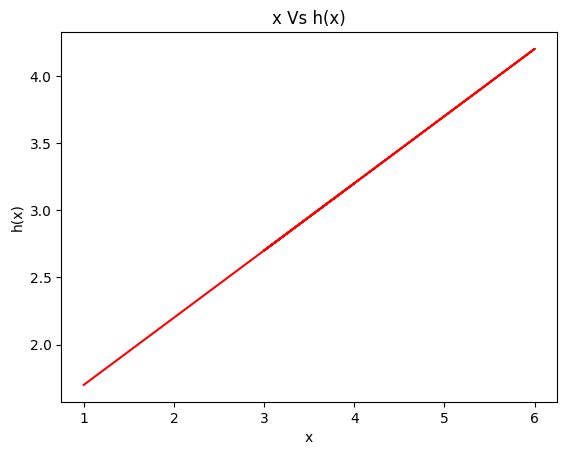

In [2]:
t0,t1=1.2,.5
x=np.array([1, 1, 2, 3, 4, 3, 4, 6, 4])
hx=t0+(t1*x)
display(hx)

#Plot 
plt.plot(x,hx,'r')
plt.xlabel('x') 
plt.ylabel('h(x)') 
plt.title('x Vs h(x)') 
plt.show() 

### 2) Create two arrays A and B with the following values using numpy array. Let (Ai,Bi) represent a data point with i th element of A and B. A = [1, 1, 2, 3, 4, 3, 4, 6, 4] B = [2, 1,  0.5,  1,  3,  3,  2,  5,  4]  Find  out  the  dot  product  of  the  vectors.  [Hint  use  numpy np.dot(a,b)]

In [3]:
A=np.array([1, 1, 2, 3, 4, 3, 4, 6, 4])
B=np.array([2, 1,  0.5,  1,  3,  3,  2,  5,  4])
np.dot(A,B)

82.0

### 3) Plot a graph marking the data points (Ai,Bi) with A on the X-axis and B on the Y-axis.

Datapoints for i=0 is (1, 2.0)
Datapoints for i=1 is (1, 1.0)
Datapoints for i=2 is (2, 0.5)
Datapoints for i=3 is (3, 1.0)
Datapoints for i=4 is (4, 3.0)
Datapoints for i=5 is (3, 3.0)
Datapoints for i=6 is (4, 2.0)
Datapoints for i=7 is (6, 5.0)
Datapoints for i=8 is (4, 4.0)


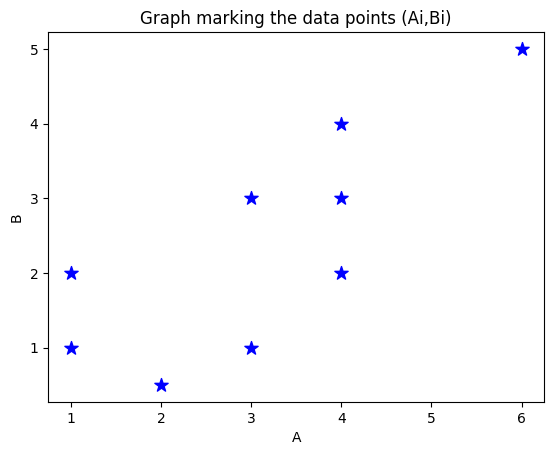

In [4]:
for i in range(len(A)):
  datapoint=(A[i],B[i])

  print(f"Datapoints for i={i} is {datapoint}")
  plt.scatter(A[i], B[i],label= "stars", color= "blue", marker= "*", s=100)
  plt.xlabel('A')
  plt.ylabel('B')
  plt.title("Graph marking the data points (Ai,Bi)")

### 4) Calculate Mean Square Error (MSE) of A and B with the formulae where n is the no: of sample data points. 

In [5]:
sum=0
n=len(A)
for i in range(n):
  sq_error=(A[i]-B[i])**2
  sum=sum+sq_error
  
MSE=sum/n
print(f"Mean Square Error (MSE) of A and B : {MSE} ")

Mean Square Error (MSE) of A and B : 1.4722222222222223 


### 5) Modify the above equation with the following cost function. Implement as a function with prototype def compute_cost_function(n,t1,A,B):

In [6]:
#Computing for t1= 0.5
def compute_cost_function(n,t1,A,B):
  sum=0
  n=len(A)
  for i in range(n):
    hx=t1*A[i]
    sq_error=(hx-B[i])**2
    sum=sum+sq_error
  j_t1=sum/(2*n)
  return j_t1
print(f"J(t1=0.5) = {compute_cost_function(n,.5,A,B)}")


J(t1=0.5) = 0.7916666666666666


In [7]:
def cost1(A,B,t,n):
  h1 = t*A

  return np.sum(np.square(h1-B))/(2*n)

In [8]:
cost1(A,B,0.5,len(A))

0.7916666666666666

When t1=0.1 , j(t1)=2.996111111111112
When t1=0.3 , j(t1)=1.653888888888889
When t1=0.5 , j(t1)=0.7916666666666666
When t1=0.7 , j(t1)=0.4094444444444445
When t1=0.8 , j(t1)=0.3983333333333334


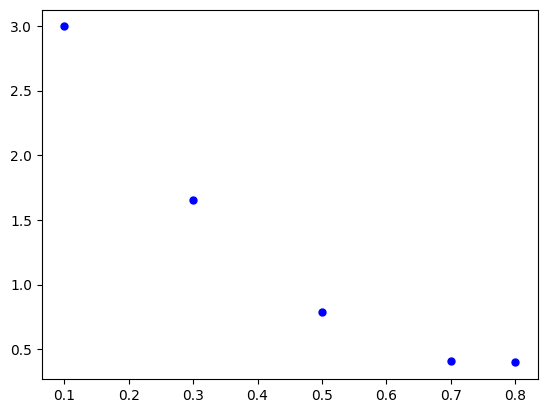

In [9]:
def compute_cost_function(n,t1,A,B):
  sum=0
  n=len(A)
  for i in range(n):
    hx=t1*A[i]
    sq_error=(hx-B[i])**2
    sum=sum+sq_error
  j_t1=sum/(2*n)
  return j_t1

t1=[0.1,0.3,0.5,0.7,0.8]
for i in range(len(t1)):
  ans=compute_cost_function(n,t1[i],A,B)
  print(f"When t1={t1[i]} , j(t1)={ans}")
  plt.scatter(t1[i],ans,label= "dot", color= "blue", marker= ".", s=100)
  # plt.plot(t1[i],ans)
  # plt.show

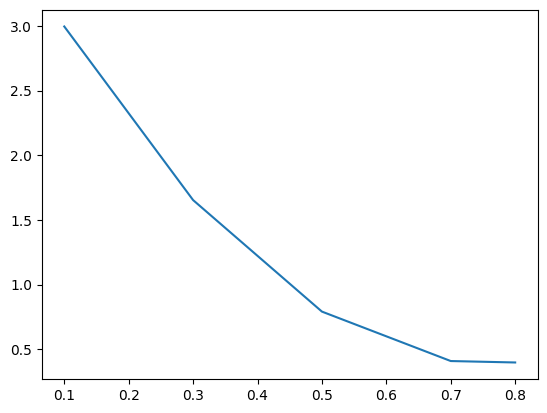

In [10]:
plt.plot(t1,[compute_cost_function(len(A),i,A,B) for i in t1])
plt.show()

# PART B : Linear Regression Implementation

## 1.Linear regression with one variable

In [11]:
data=pd.read_csv("student-por.csv")
print(data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [12]:
data.head(6)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13


## a. Generate a new data set from student scores with one feature studytimeand output variable average grade = (G1+G2+G3)/3

In [13]:
study_time=data.studytime
output=(data.G1+data.G2+data.G3)/3
# print(output)
new_col=np.column_stack((study_time,output))
df=pd.DataFrame(new_col,columns=['Studytime','Output'])
df.to_csv('New_Dataset.csv')
df

,Studytime,Output
0,2.0,7.333333
1,2.0,10.333333
2,2.0,12.333333
3,3.0,14.000000
4,2.0,12.333333
...,...,...
644,3.0,10.333333
645,2.0,15.333333
646,2.0,10.666667
647,1.0,10.000000


## b. Load the new data set 

In [14]:
new_data=pd.read_csv("New_Dataset.csv")
new_data.drop( 'Unnamed: 0', axis = 1, inplace= True)
new_data.head(6)

,Studytime,Output
0,2.0,7.333333
1,2.0,10.333333
2,2.0,12.333333
3,3.0,14.000000
4,2.0,12.333333
5,2.0,12.333333


## c. Plot data

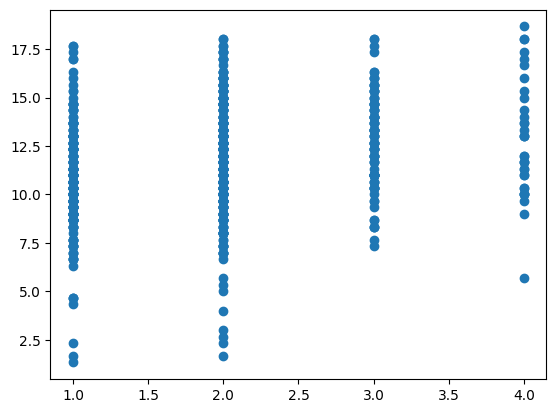

In [15]:
plt.scatter(study_time,output)

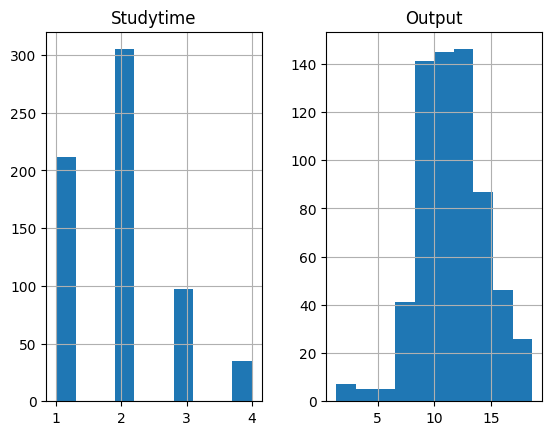

In [16]:
new_data.hist()
plt.show()

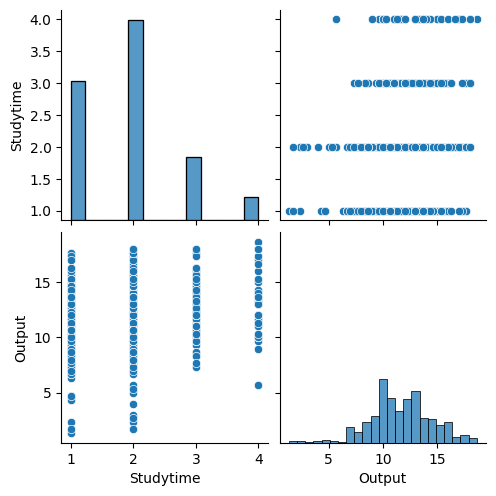

In [46]:
import seaborn as sns

sns.pairplot(new_data)

## d. Implement linear regression using inbuilt package python Scikit 

In [17]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(new_data.iloc[:,0:1].values,
                                               new_data.iloc[:,1].values,test_size=0.30,random_state=0)

In [77]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
print(y_pred)

[11.66718683 12.49200896 11.66718683 10.8423647  10.8423647  11.66718683
 12.49200896 11.66718683 10.8423647  11.66718683 10.8423647  10.8423647
 12.49200896 11.66718683 12.49200896 12.49200896 11.66718683 11.66718683
 10.8423647  11.66718683 11.66718683 10.8423647  13.31683109 11.66718683
 11.66718683 11.66718683 11.66718683 11.66718683 11.66718683 11.66718683
 11.66718683 10.8423647  10.8423647  10.8423647  12.49200896 11.66718683
 11.66718683 11.66718683 11.66718683 12.49200896 12.49200896 11.66718683
 10.8423647  11.66718683 10.8423647  10.8423647  11.66718683 10.8423647
 12.49200896 10.8423647  11.66718683 12.49200896 10.8423647  11.66718683
 10.8423647  10.8423647  11.66718683 11.66718683 12.49200896 12.49200896
 11.66718683 10.8423647  12.49200896 10.8423647  11.66718683 11.66718683
 13.31683109 11.66718683 13.31683109 10.8423647  10.8423647  10.8423647
 11.66718683 11.66718683 11.66718683 11.66718683 13.31683109 11.66718683
 11.66718683 10.8423647  11.66718683 11.66718683 11.66

## e. Implement   gradient   descent   algorithm   with   the function   prototype   def gradient_descent(alpha, x, y, max_iter=1500): where alpha is the learning rate, x is the input feature vector. y is the target. Subject the feature vector to normalisation step if needed

In [65]:

def gradient_descent(alpha, x, y, max_iter = 1500):
    J_history = []
    m = y.size
    theta = np.zeros((2, 1))
    c = np.ones((454, 1))
    x = np.column_stack((x, c))
    
    norm1 = MinMaxScaler()
    norm2 = MinMaxScaler()
    x = norm1.fit_transform(x)
    y = norm2.fit_transform(y.reshape(-1, 1)).reshape(-1)

    for i in range(max_iter):
        hx = np.dot(x, theta).reshape(-1)
        theta = theta - (alpha / m) * np.dot(x.T, (hx - y))[0]

    return theta

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [68]:
X_train.shape

(454, 1)

## f. Vary learning rate from 0.1 to 0.9 and observe the learned parameter.

In [69]:
for i in range(1, 10):
    print(gradient_descent(i / 10, X_train, Y_train))

[[1.10564954]
 [1.10564954]]
[[1.10564954]
 [1.10564954]]
[[1.10564954]
 [1.10564954]]
[[1.10564954]
 [1.10564954]]
[[1.10564954]
 [1.10564954]]
[[1.10564954]
 [1.10564954]]
[[1.10564954]
 [1.10564954]]
[[1.10564954]
 [1.10564954]]
[[1.10564954]
 [1.10564954]]


## g.  Draw the contour plot of cost function and simulate the steps of gradient descent.

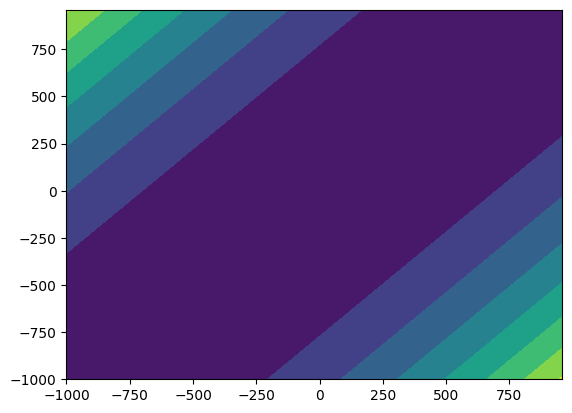

<Figure size 2000x2000 with 0 Axes>

In [75]:
xmesh, ymesh = np.mgrid[-1000: 1000: 40, -1000: 1000: 40]

def costf(x1, x2, theta):
    pred = []
    
    for i in x1:
        i = i.reshape(len(i), 1)
        i = np.column_stack((i, np.ones_like(i[:, :1])))
        predict = np.dot(i, theta).reshape(-1)
        pred.append(predict)
        
    return np.square(x2 - pred) / (2 * len(x1[0]))

theta = gradient_descent(0.1, X_train, Y_train)
plt.contourf(xmesh, ymesh, costf(xmesh, ymesh, theta))
plt.figure(figsize = (20 ,20))
plt.show()

## h. Do  simple  k-fold  and  repeated  k-fold. Compute  error  metrics  ME,  MAE,  MSE, RMSE and compare. 

In [83]:

def gradient_descent(alpha, x, y, max_iter = 1500):
    J_history = []
    m = y.size
    theta = np.zeros((2, 1))
    c = np.ones((x.shape[0], 1))
    x = np.column_stack((x, c))

    for i in range(max_iter):
        hx = np.dot(x, theta).reshape(-1)
        theta = theta - (alpha / m) * np.dot(x.T, (hx - y))[0]

    return theta

def prediction(X_test, theta):
    X_test = np.array(X_test)
    X_test = np.column_stack((X_test, np.ones_like(X_test[:, :1])))
    return np.dot(i, theta)

def kfold(data, kf = KFold()):
    me, mae, mse, rmse = [], [], [], []
    
    for train_index, test_index in kf.split(data):
        X_train = data.iloc[train_index].drop('Output', axis = 1)
        y_train = data.iloc[train_index]['Output']
        X_test = data.iloc[test_index].drop('Output', axis = 1)
        y_test = data.iloc[test_index]['Output']
        
        theta = gradient_descent(0.01, X_train, y_train)
        y_pred = prediction(X_test, theta)
        
        me.append(np.sum(y_test.values - y_pred) / len(y_test.values))
        mae.append(np.sum(np.abs(y_test.values - y_pred)) / len(y_test.values))
        mse.append(np.sum(np.square(y_test.values - y_pred)) / len(y_test.values))
        rmse.append(np.sqrt(np.sum(np.square(y_test.values - y_pred))) / len(y_test.values))
        
    print(f'''ME:{me}
\nMAE:{mae}
\nMSE:{mse}
\nRMSE:{rmse}
''')
        
kf1 = KFold(10)
kfold(df, kf1)

ME:[-39.576163750412626, -42.38861746361741, -43.41291088361045, -40.81157580283788, -41.505448198478945, -38.177400119260525, -41.606956715938686, -44.3862855421851, -46.15224106071024, -43.65183351177724]

MAE:[39.576163750412626, 42.38861746361741, 43.41291088361045, 40.81157580283788, 41.505448198478945, 38.177400119260525, 41.606956715938686, 44.3862855421851, 46.15224106071024, 43.65183351177724]

MSE:[790.5207735964494, 906.2326063166829, 952.9132493562158, 842.9549370071991, 872.5640539343252, 742.6051976582376, 882.4427437650871, 998.6490813864121, 1079.9280239455313, 987.852775355376]

RMSE:[3.4873855616105875, 3.733904136045774, 3.828864562275541, 3.60118556761776, 3.6638862384386863, 3.380043690337193, 3.684568117401356, 3.919672438014358, 4.076061492601616, 3.928765660475024]

